# Bloque 8: Introducción al Análisis Espacial con GeoPandas 🌍

En este bloque aprenderás a:
✅ Entender los conceptos básicos de datos geoespaciales (vectores y CRS).  
✅ Crear mapas a partir de datos de biodiversidad con coordenadas.  
✅ Usar GeoPandas para generar, visualizar y proyectar datos espaciales.  
✅ Crear mapas temáticos simples de distribución de especies.

💡 *Objetivo:* visualizar los registros biológicos georreferenciados en un mapa real.


2. Instalación y carga de librerías

In [1]:
!pip install geopandas contextily matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 72.7 MB/s eta 0:00:00


In [2]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

# Estilo visual
plt.rcParams["figure.figsize"] = (10, 6)


3. Cargar el dataset limpio

In [3]:
# Cargar el dataset limpio (del bloque anterior)
df = pd.read_csv('/content/db_Dasypus_novemcinctus.csv')

# Ver primeras filas
df.head()


/tmp/ipython-input-1943075946.py:2: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/db_Dasypus_novemcinctus.csv')


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,998689741,0057a720-17c9-4658-971e-9578f3577cf5,FT:RUTM:0003,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,Carlos Alberto Hernández Medina,2013-09-12T00:00:00,CC_BY_NC_4_0,Fundacion Tropico,Carlos Alberto Hernández Medina,NaN,NaN,2025-10-08T06:00:10.753Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...
1,986148719,71e82020-f762-11e1-a439-00145eb45e9a,urn:catalog:OMNH:OCGR:11993,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,NaN,CC0_1_0,NaN,"Grogan, ME, Waits, JL",NaN,NaN,2025-10-07T23:08:00.156Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...
2,923924578,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/759335,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,Chris Hyde,2014-06-29T18:15:51,CC_BY_NC_4_0,Chris Hyde,Chris Hyde,NaN,NaN,2025-10-14T18:12:33.802Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
3,923924015,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/757410,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,Chris Hyde,2014-06-28T06:30:10,CC_BY_NC_4_0,Chris Hyde,Chris Hyde,NaN,NaN,2025-10-14T18:12:35.051Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
4,923916591,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/739294,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,caseyzill,2014-06-16T13:53:55,CC_BY_NC_4_0,caseyzill,caseyzill,NaN,NaN,2025-10-14T15:28:39.312Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES


4. Crear un GeoDataFrame

In [4]:
# Convertir el DataFrame en un GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['decimalLongitude'], df['decimalLatitude']),
    crs="EPSG:4326"  # WGS84
)

gdf.head()


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,geometry
0,998689741,0057a720-17c9-4658-971e-9578f3577cf5,FT:RUTM:0003,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,2013-09-12T00:00:00,CC_BY_NC_4_0,Fundacion Tropico,Carlos Alberto Hernández Medina,NaN,NaN,2025-10-08T06:00:10.753Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...,POINT (-76.11225 4.59036)
1,986148719,71e82020-f762-11e1-a439-00145eb45e9a,urn:catalog:OMNH:OCGR:11993,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,CC0_1_0,NaN,"Grogan, ME, Waits, JL",NaN,NaN,2025-10-07T23:08:00.156Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...,POINT (-89.42301 35.05684)
2,923924578,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/759335,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,2014-06-29T18:15:51,CC_BY_NC_4_0,Chris Hyde,Chris Hyde,NaN,NaN,2025-10-14T18:12:33.802Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES,POINT (-99.9475 31.95062)
3,923924015,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/757410,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,2014-06-28T06:30:10,CC_BY_NC_4_0,Chris Hyde,Chris Hyde,NaN,NaN,2025-10-14T18:12:35.051Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES,POINT (-98.43753 29.71774)
4,923916591,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/739294,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,2014-06-16T13:53:55,CC_BY_NC_4_0,caseyzill,caseyzill,NaN,NaN,2025-10-14T15:28:39.312Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES,POINT (-97.74306 30.26715)


Explicación:

geometry define los puntos espaciales.

EPSG:4326 es el sistema de referencia geográfica global (lat/lon).

5. Comprobar el CRS (Sistema de Referencia de Coordenadas)

In [5]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# Convertir a un CRS proyectado (por ejemplo, pseudo-Mercator)
gdf_mercator = gdf.to_crs(epsg=3857)


*Pregunta:
¿Por qué es necesario cambiar el CRS para visualizar mapas base (como los de contextily)?*

6. Graficar puntos básicos

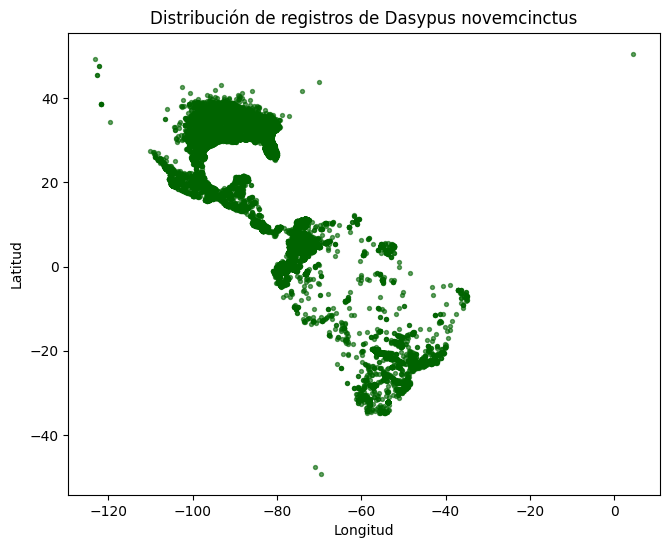

In [7]:
gdf.plot(markersize=8, color="darkgreen", alpha=0.6)
plt.title("Distribución de registros de Dasypus novemcinctus")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


*Ejercicio:
Cambia el color y tamaño de los puntos.
Prueba con otros atributos, como basisOfRecord, para colorear los registros por tipo.*

7. Añadir mapa base con Contextily

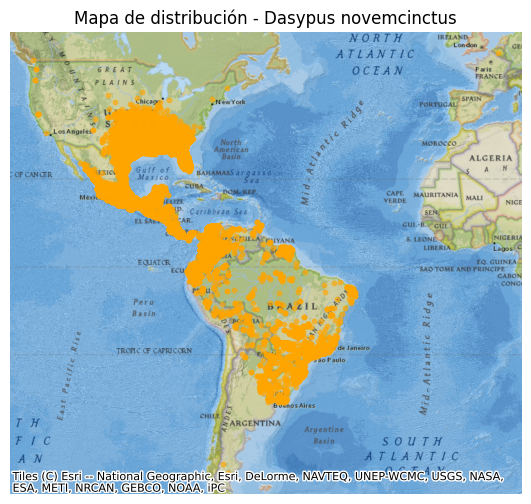

In [8]:
fig, ax = plt.subplots()
gdf_mercator.plot(ax=ax, markersize=10, color='orange', alpha=0.6)
ctx.add_basemap(ax, source=ctx.providers.Esri.NatGeoWorldMap)
ax.set_title("Mapa de distribución - Dasypus novemcinctus")
ax.set_axis_off()
plt.show()

*Reto:
Prueba otros mapas base:*


```
ctx.providers.CartoDB.Positron

ctx.providers.Stamen.TonerLite
```


8. Mapas temáticos

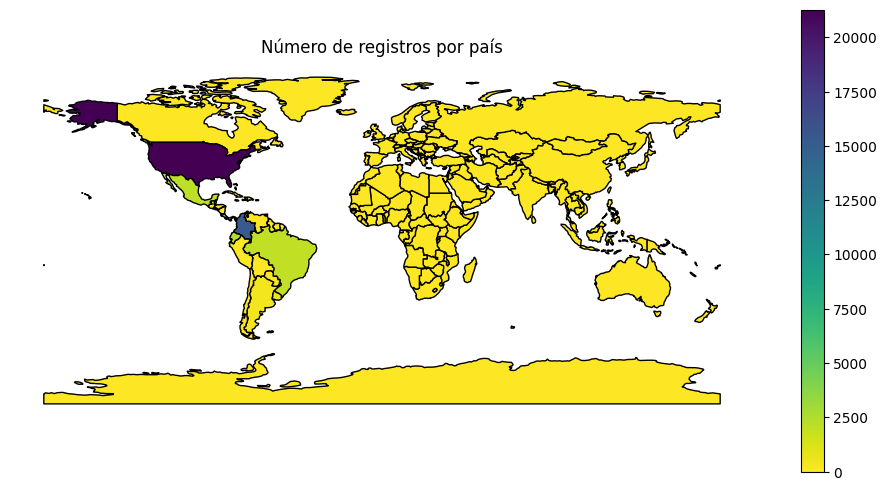

In [9]:
# Contar registros por countryCode
registros_pais = df.groupby('countryCode').size().reset_index(name='count')

# Cargar límites de países del mundo
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

# Unir usando ISO_A2 (nota: en mayúsculas)
world_gbif = world.merge(registros_pais, how='left', left_on='ISO_A2', right_on='countryCode')

# Rellenar los conteos faltantes con 0 para una visualización más limpia
world_gbif['count'] = world_gbif['count'].fillna(0)

# Graficar
world_gbif.plot(column='count', cmap='viridis_r', legend=True, edgecolor='black', figsize=(12, 6))
plt.title('Número de registros por país')
plt.axis('off')  # Opcional: ocultar los ejes para un mapa más limpio
plt.show()

*Interpretación:
¿Qué países concentran más registros?
¿Coincide con las zonas naturales donde vive la especie?*

9. Filtrado espacial (opcional)

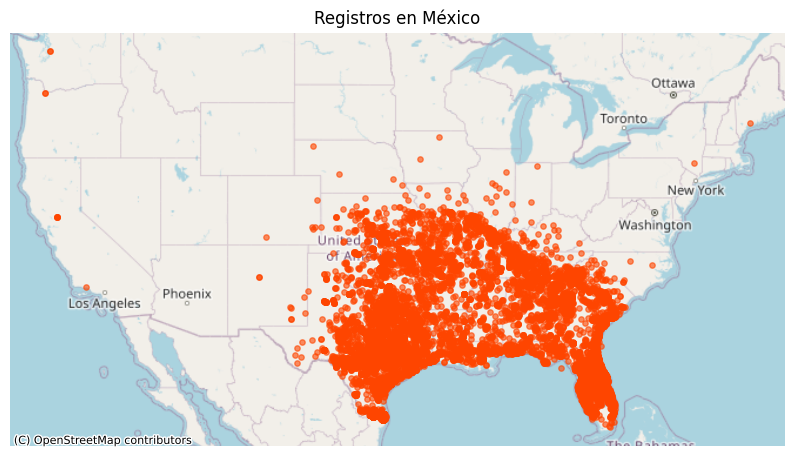

In [10]:
# Filtrar registros solo de México
gdf_mexico = gdf[gdf['countryCode'] == 'US']

# Mapa de puntos de México
fig, ax = plt.subplots()
gdf_mexico.to_crs(epsg=3857).plot(ax=ax, color='orangered', alpha=0.6, markersize=15)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Registros en México")
ax.set_axis_off()
plt.savefig('sine_wave.png')
plt.show()


*Ejercicio:
Aplica el mismo filtro para otro país o región de interés y compara las distribuciones.*

# 🧠 Mini Reto: Visualiza tu especie

1. Carga el dataset limpio de tu especie.  
2. Crea un `GeoDataFrame` con columnas de latitud y longitud.  
3. Grafica los puntos en un mapa base con `contextily`.  
4. Colorea los puntos según país o tipo de registro.  
5. Guarda tu mapa como imagen (`plt.savefig("mapa_especie.png")`).

💬 *Preguntas de reflexión:*
- ¿Tu especie tiene una distribución amplia o restringida?  
- ¿Los registros se concentran en un país específico?  
- ¿Existen vacíos geográficos donde no hay datos?


Ejemplo de color por país:

In [ ]:
fig, ax = plt.subplots()
gdf_mercator.plot(ax=ax, column='country', legend=True, cmap='Set2', alpha=0.8)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('Distribución de registros por país')
plt.show()


11. Exportar tus resultados

In [11]:
# Guardar el GeoDataFrame en formato shapefile o GeoJSON
gdf_mercator.to_file('gbif_dasypus_mapa.shp')
gdf_mercator.to_file('gbif_dasypus_mapa.geojson', driver='GeoJSON')

print("Archivos exportados: shapefile y geojson listos para GIS")


/tmp/ipython-input-1237746665.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_mercator.to_file('gbif_dasypus_mapa.shp')
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'occurrenceID' to 'occurrence'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'infraspecificEpithet' to 'infraspeci'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'scientificName' to 'scientific'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'verbatimScientificName' to 'verbatimSc'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'verbatimScientificNameAuthorship' to 'verbatim_1'
  ogr_write(
/usr/local/

Archivos exportados: shapefile y geojson listos para GIS


En este bloque aprendiste a:
✅ Convertir tus datos tabulares en datos espaciales con GeoPandas.  
✅ Comprender y cambiar sistemas de referencia de coordenadas (CRS).  
✅ Generar mapas de puntos y coropléticos.  
✅ Exportar tus datos espaciales para GIS.

🚀 En el siguiente bloque (Bloque 9) aprenderás a crear **visualizaciones espaciales avanzadas**,
como mapas de densidad, mapas con capas base y mapas interactivos con Folium.
